In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
def threshold_sys(sig, th):
    out = np.zeros(len(sig))
    for i in range(len(sig)):
        if(sig[i] > th):
             out[i] = sig[i] - th
    return out

In [ ]:
fs = 1e6
tp = 0.1
t = np.linspace(0, tp, int(tp*fs))
f_sig = 100
A_sig = 1
sd = 0.75
V_th = 2

# signal
sig = A_sig*np.sin(2*np.pi*f_sig*t)

#noise
noise = np.random.normal(0, sd, len(t))
sig_in = sig+noise

#output
out_sig = threshold_sys(sig_in, 2)

# taking PSD of the input/output signal
freq, psd_in = sc.signal.periodogram(sig_in, fs)
freq, psd_out = sc.signal.periodogram(out_sig, fs)

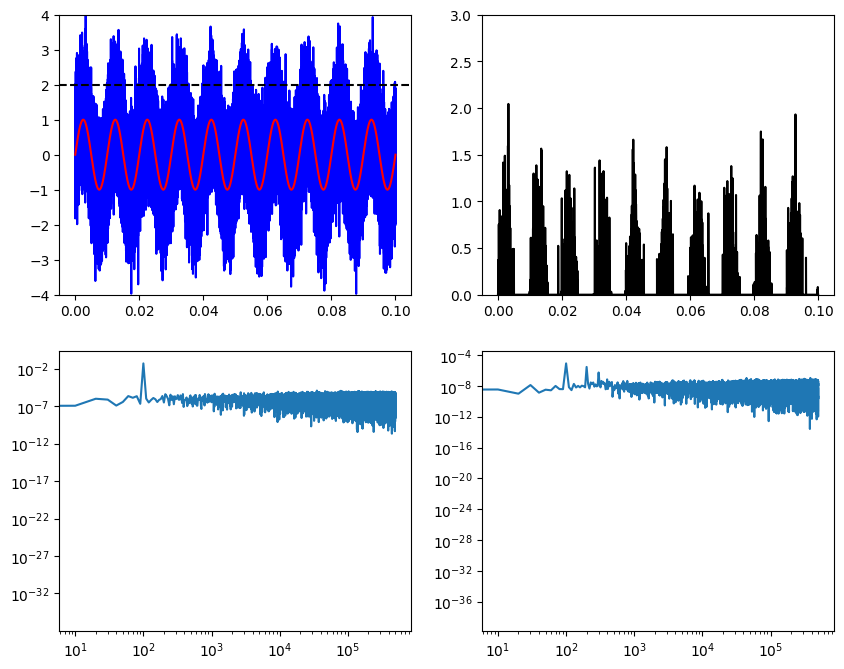

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1); plt.plot(t, sig_in, c = "blue");  plt.plot(t, sig, c = "red"); plt.axhline(y=V_th, linestyle = "--", c = "black"); plt.ylim([-4,4])
plt.subplot(2,2,2); plt.plot(t, out_sig,  c = "black"); plt.ylim([0,3])
plt.subplot(2,2,3); plt.loglog(freq, psd_in)
plt.subplot(2,2,4); plt.loglog(freq, psd_out)